In [24]:
import numpy as np 
import matplotlib.pyplot as plt
from utils import euclidean_distance, evaluate_model

In [25]:
'''

Class KNN:
    Function __init__(self, k):
        Set self.k = k

    Function fit(self, X_train, y_train):
        Store X_train and y_train

    Function predict(self, X_test):
        Initialize empty list y_pred
        For each test_point in X_test:
            Compute distances from test_point to all points in X_train
            Sort training points by distance
            Select the k nearest neighbors
            Find the most common label among k neighbors
            Append the predicted label to y_pred
        Return y_pred

'''

class knn:

    def __init__(self, k):
        self.k = k

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        y_pred = []

        # calculating distance between each x_test with each x_train
        for test_point in x_test:
                distances = np.array([euclidean_distance(test_point, x) for x in self.x_train]) # converted to numpy for easy sorting
                # sorting training points by distance (argsort)
                k_idx = np.argsort(distances)[:self.k]
                # finding corresponding labels
                y_labels = self.y_train[k_idx]
                # returning the most common label
                pred_label = np.bincount(y_labels).argmax()
                y_pred.append(pred_label)
       
        return np.array(y_pred)


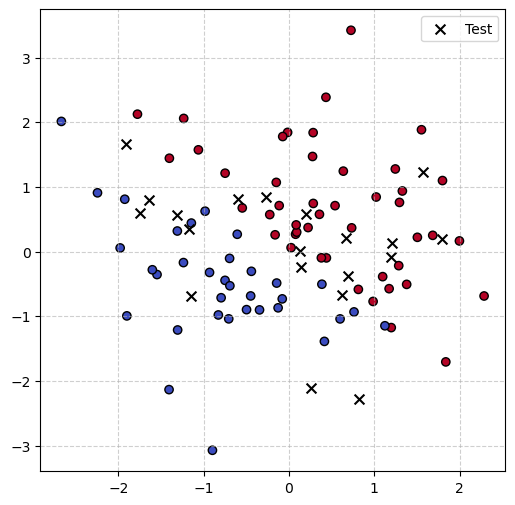

In [26]:
from sklearn.model_selection import train_test_split

x = np.random.randn(100, 2)
y_train = (x[:, 0] + x[:, 1] > 0).astype(int)

x_train, x_test, y_train, y_test = train_test_split(
        x, y_train, test_size=0.2
    )

plt.figure(figsize=(6, 6)) 
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.scatter(x_test[:, 0], x_test[:, 1], c='black', marker='x', s=50, label='Test')  
plt.grid(True, linestyle="--", alpha=0.6) 
plt.legend()
plt.show()


In [27]:
model = knn(k = 2)
model.fit(x_train, y_train)
pred = model.predict(x_test)

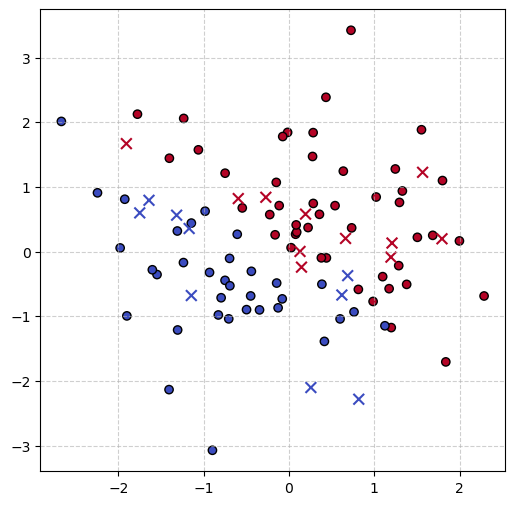

In [28]:
plt.figure(figsize=(6, 6)) 
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.scatter(x_test[:, 0], x_test[:, 1], c=pred, cmap='coolwarm', marker='x', s=60)
plt.grid(True, linestyle="--", alpha=0.6) 
plt.show()


In [29]:
evaluate_model(y_test, pred)

Accuracy: 0.8500
Precision: 0.8535
Recall: 0.8500
F1 Score: 0.8496


(0.85, 0.8535353535353536, 0.85, 0.849624060150376)